In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - loss: 0.1185 - val_loss: 0.1140
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - loss: 0.1123 - val_loss: 0.1140
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - loss: 0.1123 - val_loss: 0.1140
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - loss: 0.1123 - val_loss: 0.1140
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 12/20
938/938 ━━━━━━━━━━

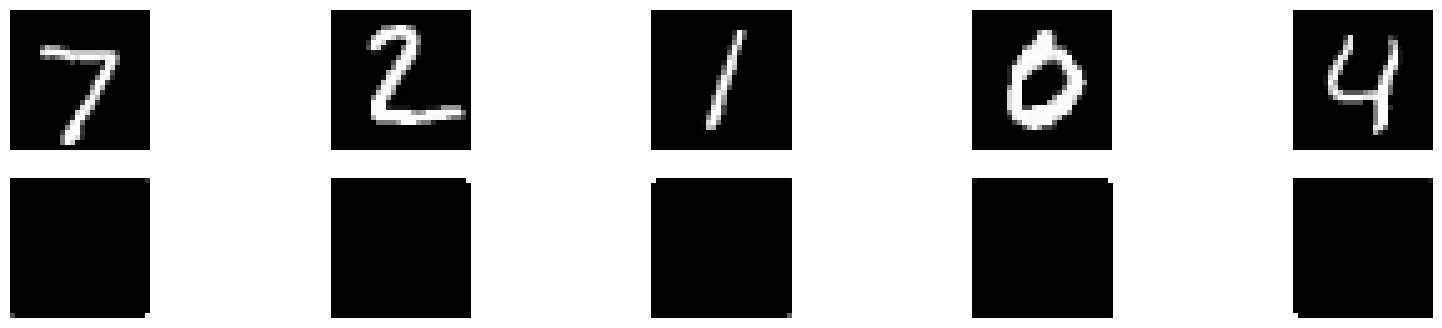

In [ ]:
# Reshape data for CNN Autoencoder
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define CNN Encoder
input_img = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Define CNN Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create Autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, validation_data=(x_test, x_test))

# Visualize reconstructed images
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))
n = 5
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
